### Importing libraries to create the dashboard

In [54]:
# Import libraries
from dotenv import load_dotenv
import os
import psycopg2
from sqlalchemy import create_engine, MetaData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import math
import numpy as np

### Load Environment Variables

In [2]:
# Load environment variables
load_dotenv()
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')

### Connect to the Online Database

In [11]:
# Connect to the Stack Overflow database
conn = psycopg2.connect(
    host=db_host,
    database=db_name,
    user=db_user,
    password=db_password
)

### Defining the Heart Metrics and storing it in a Dictionary

In [4]:
# Define HEART metrics for Stack Overflow
heart_metrics = {
    'Happiness': 'Measure of user satisfaction and happiness with the Questions & Answers product.',
    'Engagement': 'Measure of user interaction and activity on the platform.',
    'Adoption': 'Measure of user acquisition and growth of Stack Overflow user base.',
    'Retention': 'Measure of user retention and continued usage of the platform over time.',
    'Task Success': 'Measure of user ability to accomplish their goals and tasks effectively on Stack Overflow.'
}

### Creating a SQLAlchemy Engine to be used for Data Exploration with Pandas

In [3]:
# Configure %sql magic to allow me to run SQL queries in jupyter cells directly
%config SqlMagic.autocommit=False
%config SqlMagic.displaycon = False
%load_ext sql
%config SqlMagic.feedback = False
%config SqlMagic.autopandas = True
%sql postgresql://{db_user}:{db_password}@{db_host}/{db_name}

In [12]:
engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}/{db_name}")
connection = engine.connect()

In [5]:
# Check what tables exists within the database
metadata = MetaData()
metadata.reflect(bind=engine)

tables = metadata.tables
tables_list = [table for table in tables]
print("Tables in the database:")
tables_list

Tables in the database:


['users', 'posts', 'votes', 'tags', 'comments']

In [8]:
# Test the connection through users table
test_query = "SELECT * FROM users LIMIT 5"
test_df = pd.read_sql(test_query, connection)
test_df

,id,account_id,reputation,views,down_votes,up_votes,display_name,location,profile_image_url,website_url,about_me,creation_date,last_access_date
0,13990332,19152802,1,1,0,0,dropkicc,None,None,None,None,2020-07-24 18:26:03.427,2020-12-31 01:53:23.433
1,13990333,19152803,1,1,0,0,Carlos Calderon,None,None,None,None,2020-07-24 18:26:16.733,2022-10-16 00:21:02.993
2,13990334,19152804,1,2,0,0,Yogesh Mathur,India,None,None,None,2020-07-24 18:26:22.877,2020-08-16 15:38:01.953
3,13990335,19152805,1,1,0,0,ปฐมพร เมฆทวีป,None,None,None,None,2020-07-24 18:26:32.657,2020-07-24 20:27:53.290
4,13990336,19152807,1,5,0,0,LuciferMorningstar,None,None,None,None,2020-07-24 18:26:34.047,2022-03-17 17:32:53.177


### Data Exploration on Tables
After having a look at the notes made in my plan.md, I believe that `Posts` table would be good to explore first. This is because I don't really know what posts users can be making and getting an understanding of this first would give me a better of what the product is for the users.

After getting a grasp of what the product is, looking at the votes and feedback could be a good next step.

In [9]:
# Exploring Posts table
posts_query = "SELECT * FROM Posts ORDER BY id LIMIT 5"
posts_df = pd.read_sql(posts_query, connection)
posts_df

,id,owner_user_id,last_editor_user_id,post_type_id,accepted_answer_id,score,parent_id,view_count,answer_count,comment_count,...,title,tags,content_license,body,favorite_count,creation_date,community_owned_date,closed_date,last_edit_date,last_activity_date
0,4,8,16124033,1,7.0,787,NaN,69172.0,14.0,7,...,How to convert Decimal to Double in C#?,<c#><floating-point><type-conversion><double><...,CC BY-SA 4.0,<p>I want to assign the decimal variable &quot...,0.0,2008-07-31 21:42:52.667,2012-10-31 16:42:47.213,None,2022-09-08 05:07:26.033,2022-09-08 05:07:26.033
1,6,9,9134576,1,31.0,319,NaN,23239.0,7.0,0,...,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,CC BY-SA 4.0,<p>I have an absolutely positioned <code>div</...,0.0,2008-07-31 22:08:08.620,NaT,None,2021-01-29 18:46:45.963,2021-01-29 18:46:45.963
2,7,9,5496973,2,NaN,518,4.0,NaN,NaN,1,...,None,None,CC BY-SA 4.0,<p>An explicit cast to <code>double</code> lik...,NaN,2008-07-31 22:17:57.883,NaT,None,2019-10-21 14:03:54.607,2019-10-21 14:03:54.607
3,9,1,3524942,1,1404.0,2179,NaN,770310.0,71.0,10,...,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,CC BY-SA 4.0,<p>Given a <code>DateTime</code> representing ...,0.0,2008-07-31 23:40:59.743,2011-08-16 19:40:43.080,None,2022-07-27 22:34:36.320,2022-11-29 15:05:54.720
4,11,1,16790137,1,1248.0,1636,NaN,195320.0,41.0,3,...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,CC BY-SA 4.0,<p>Given a specific <code>DateTime</code> valu...,0.0,2008-07-31 23:55:37.967,2009-09-04 13:15:59.820,None,2022-07-10 00:19:55.237,2022-09-05 11:26:30.187


This is really interesting and gave me insights as to what this table is about. From the rows here, I can see there are a few other tables it's connecting up to i.e. PostTypes, Users, PostNotices. As there are 22 columns in total, I want to select a few that are numeric i.e. comment and answer count to understand better what these values can mean.

In [10]:
posts_df.columns

Index(['id', 'owner_user_id', 'last_editor_user_id', 'post_type_id',
       'accepted_answer_id', 'score', 'parent_id', 'view_count',
       'answer_count', 'comment_count', 'owner_display_name',
       'last_editor_display_name', 'title', 'tags', 'content_license', 'body',
       'favorite_count', 'creation_date', 'community_owned_date',
       'closed_date', 'last_edit_date', 'last_activity_date'],
      dtype='object')

In [11]:
posts_df_filtered = posts_df[['id', 'score', 'view_count', 'answer_count', 'comment_count','favorite_count']]
posts_df_filtered

,id,score,view_count,answer_count,comment_count,favorite_count
0,4,787,69172.0,14.0,7,0.0
1,6,319,23239.0,7.0,0,0.0
2,7,518,NaN,NaN,1,NaN
3,9,2179,770310.0,71.0,10,0.0
4,11,1636,195320.0,41.0,3,0.0


The rows here are particularly helpful, giving an overview what these numbers mean, and we can also see that some rows are missing data or have 0 counts. 

In [12]:
# Check what table names are from tables list
tables_list

['users', 'posts', 'votes', 'tags', 'comments']

### Exploring the Votes and Feedback data

In [13]:
votes_query = "SELECT * FROM votes ORDER BY id LIMIT 5"
votes_df = pd.read_sql(votes_query, connection)
votes_df

,id,user_id,post_id,vote_type_id,bounty_amount,creation_date
0,1,None,1,2,None,2008-07-31
1,2,None,3,2,None,2008-07-31
2,3,None,2,2,None,2008-07-31
3,4,None,4,2,None,2008-07-31
4,5,None,6,2,None,2008-07-31


This looks interesting and as a next step, I want to see what the unique values are for the vote_type_id so I am going to have grab more rows to find out about this. For now, I can see that a user id and a post id is link to each vote and also there is an interesting column bounty_amount - would love to understand what this is about!

In [14]:
# Let's grab the first 100 rows
votes_query = "SELECT * FROM votes ORDER BY id LIMIT 100"
votes_df = pd.read_sql(votes_query, connection)
votes_df

,id,user_id,post_id,vote_type_id,bounty_amount,creation_date
0,1,None,1,2,None,2008-07-31
1,2,None,3,2,None,2008-07-31
2,3,None,2,2,None,2008-07-31
3,4,None,4,2,None,2008-07-31
4,5,None,6,2,None,2008-07-31
...,...,...,...,...,...,...
95,194,None,127,2,None,2008-08-01
96,195,None,126,2,None,2008-08-01
97,200,None,117,3,None,2008-08-01
98,201,None,111,2,None,2008-08-01


In [15]:
# Find out the unique values of vote_type_id
votes_df['vote_type_id'].unique()

array([2, 3, 1])

Okay so for now there seems to be at least 3 different values for vote types meaning there are at least 3 different types of votes you can do on Stackoverflow 

In [16]:
# Let's get some info on the votes columns and it's data types
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             100 non-null    int64         
 1   user_id        0 non-null      object        
 2   post_id        100 non-null    int64         
 3   vote_type_id   100 non-null    int64         
 4   bounty_amount  0 non-null      object        
 5   creation_date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.8+ KB


Okay so I wanted to check the bounty_amount column to see if there are any non null values and they all are. Let's see if I can grab some non-null rows and save it in a new dataframe

In [24]:
votes_query = "SELECT * FROM votes WHERE bounty_amount IS NOT NULL ORDER BY id LIMIT 5"
votes_df = pd.read_sql(votes_query, connection)
votes_df

,id,user_id,post_id,vote_type_id,bounty_amount,creation_date
0,1472821,4234,98225,8,350,2009-01-27
1,1472847,4234,296603,8,550,2009-01-27
2,1472968,2140,309711,8,250,2009-01-27
3,1473097,2635,222716,8,150,2009-01-27
4,1473113,2822,74883,8,200,2009-01-27


This is interesting to see as we can see there can be a bounty amount for votes. Not sure what this really means. Last thing I want to explore before we get too deep is how many non null values rows there are for bounty_amount

In [25]:
votes_query = "SELECT * FROM votes WHERE bounty_amount IS NOT NULL ORDER BY id"
votes_df = pd.read_sql(votes_query, connection)
votes_df

,id,user_id,post_id,vote_type_id,bounty_amount,creation_date
0,1472821,4234.0,98225,8,350,2009-01-27
1,1472847,4234.0,296603,8,550,2009-01-27
2,1472968,2140.0,309711,8,250,2009-01-27
3,1473097,2635.0,222716,8,150,2009-01-27
4,1473113,2822.0,74883,8,200,2009-01-27
...,...,...,...,...,...,...
448909,265133236,8165583.0,75612754,8,50,2023-03-05
448910,265133583,282328.0,75590032,8,100,2023-03-05
448911,265134182,1103606.0,75573903,8,50,2023-03-05
448912,265135287,5328691.0,75626337,8,50,2023-03-05


Okay this is a lot of rows (44k) with bounty_amount, also shows this dataset is huge so need to be careful when making visualisations and analysis

### Data Exploration on Comments table

In [27]:
comments_query = "SELECT * FROM comments LIMIT 5"
comments_df = pd.read_sql(comments_query, connection)
comments_df

,id,post_id,user_id,score,content_license,user_display_name,text,creation_date
0,10,45651,242,6,CC BY-SA 2.5,None,It will help if you give some details of which...,2008-09-06 13:38:23.647
1,12,47428,4642,3,CC BY-SA 2.5,None,One of the things that make a url user-friendl...,2008-09-06 13:51:47.843
2,14,47481,4642,0,CC BY-SA 2.5,None,"I agree, both CodeRush and RefactorPro are vis...",2008-09-06 14:15:46.897
3,15,47373,2495,0,CC BY-SA 2.5,None,Just wanted to mention that this is an excelle...,2008-09-06 14:30:40.217
4,16,47497,4642,1,CC BY-SA 2.5,None,"Indeed, the only way to do this is get the ser...",2008-09-06 14:42:35.303


Okay from this we can see it's got some interesting details, particularly the score where this is giving us an idea how popular or helpful this comment is for other users. 

In [28]:
# Let's do a quick check on the data types of these columns
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5 non-null      int64         
 1   post_id            5 non-null      int64         
 2   user_id            5 non-null      int64         
 3   score              5 non-null      int64         
 4   content_license    5 non-null      object        
 5   user_display_name  0 non-null      object        
 6   text               5 non-null      object        
 7   creation_date      5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 452.0+ bytes


Nothing unusual here, good to know that the creation date is a datetime 

### Data Exploration on tags table

In [29]:
tables_list

['users', 'posts', 'votes', 'tags', 'comments']

In [31]:
tags_query = "SELECT * FROM tags ORDER BY id LIMIT 5"
tags_df = pd.read_sql(tags_query, connection)
tags_df

,id,excerpt_post_id,wiki_post_id,tag_name,count
0,1,3624959,3607476,.net,329455
1,2,3673183,3673182,html,1167742
2,3,3624960,3607052,javascript,2479947
3,4,3644670,3644669,css,787138
4,5,3624936,3607050,php,1456271


Okay this is giving me a bit more insights as to what this table is showing. I believe the count column is counting how many posts have that tag_name i.e. .net has 329455 posts. excerpt_post_id and wiki_post_id are the ids associated with the post and the wiki post using that tag.

### Data Exploration on the users table

In [32]:
users_query = "SELECT * FROM users ORDER BY id LIMIT 5"
users_df = pd.read_sql(users_query, connection)
users_df

,id,account_id,reputation,views,down_votes,up_votes,display_name,location,profile_image_url,website_url,about_me,creation_date,last_access_date
0,-1014,None,1,0,0,0,R Language,None,None,None,<p>A collective where data scientists and AI r...,2023-02-17 19:52:56.213,2023-02-17 19:52:56.280
1,-1013,None,1,0,0,0,CI/CD,None,None,None,<p>A collective where developers focused on co...,2023-02-17 19:25:19.953,2023-02-17 19:25:20.037
2,-1012,None,1,0,0,0,Audio,None,None,None,<p>Official Q&amp;A for Audio support. This co...,2023-02-15 23:24:13.363,2023-02-15 23:24:13.373
3,-1011,None,1,0,0,0,AWS,None,None,None,<p>Amazon Web Services (AWS) is the world’s mo...,2022-11-09 20:49:03.637,2022-11-09 20:49:03.637
4,-1010,None,1,0,0,0,Microsoft Azure,None,None,None,"<p>On-premises, hybrid, multicloud, or at the ...",2022-10-25 19:18:31.537,2022-10-25 19:18:31.537


Once of the interesting things I have noticed is that there are negative ids here. I am not sure if it is because stackoverflow has so many users that it ran out of positive numbers or something bizzare happened one day but something imortant to note. 

Otherwise this table looks pretty standard in terms of the fact it's storing user profile information i.e. display name, how people have viewed their profile, their bio, when they were created and when they last used stack overflow. I think when going in and creating the dashboard, the important metrics to look at from this table will be their creation date and last access date as well as reputation, views, down_votes and up_votes to see how engaged they are in using the product

### Metrics to look at to assess happiness
After completing initial data exploration and understanding what the tables show, I believe the following columns are worth using to measure the happiness and satisfication of users using Stackoverflow.

#### Posts
* favorite_count
* accepted_answer_id
* score
#### Comments
* score
#### Users
* up_votes
* down_votes

The plan is to do inner joins, I can look at joining all three together later but for initial analysis, let's join them as follows:
* posts and comments on post_id
* users and comments on user_id
* users and posts on user_id

Testin SQL queries in cells before using it pandas, easier for debugging

`ORDER BY RAND()` allows us to take random rows from the table


In [30]:
%%sql
SELECT comments.id, comments.score, users.up_votes, users.down_votes 
FROM users 
INNER JOIN 
comments 
ON users.id = comments.user_id 
ORDER BY RANDOM()
LIMIT 20

,id,score,up_votes,down_votes
0,45598670,0,7,0
1,3637465,1,1569,46
2,58078432,1,14335,71484
3,22525688,0,2244,21
4,40406159,0,13,0
5,60420168,6,5934,2473
6,61609552,0,2930,0
7,48249632,0,55,114
8,28852880,0,101,1
9,20033377,0,1013,11


As the ORDER BY RAND() method took a long time (2 mins), I wanted to use a faster method do do sampling through TABLESAMPLE but found I don't have the CREATE privilege to do so

In [31]:
%%sql
CREATE EXTENSION tsm_system_rows;
SELECT comments.id, comments.score, users.up_votes, users.down_votes 
FROM users 
INNER JOIN 
comments 
ON users.id = comments.user_id 
TABLESAMPLE system_rows(1);

(psycopg2.errors.InsufficientPrivilege) permission denied to create extension "tsm_system_rows"
HINT:  Must have CREATE privilege on current database to create this extension.

[SQL: CREATE EXTENSION tsm_system_rows;]
(Background on this error at: https://sqlalche.me/e/20/f405)


Check how many rows there are in when I do the innerjoin on users and comments table to decide a good sampling size

In [36]:
%%sql
SELECT COUNT(*)
FROM users
INNER JOIN 
comments
ON users.id = comments.user_id;

,count
0,86767203


Did some research and found that the ideal formula to find a good sample size to estimate the mean of the dataset is a 95% confidence level, 5% margin of error and 0.5 standard deviation (conservative estimate). The following is code I found to calculate the sample size I want and setting it up as a function so it can be reused for later.

In [49]:
z = 1.96  # 95% confidence level
e = 0.05  # Margin of error
sigma = 0.5 # Conservative estimate of SD

def calculate_sample_size(population_size, z, e, sigma):
    n = (z**2 * sigma**2 * (1 - (e**2 / population_size))) / (e**2)
    return math.ceil(n) #Round up the number and return as whole number

In [50]:
sample_size = calculate_sample_size(86767203, z, e, sigma)
sample_size

385

Now I am going to perform the SQL I did before and LIMIT the rows to 385 and use the ORDER BY RAND() to collect random rows. I also decided to adjust the columns I will select and add the user_id.

In [51]:
join_query = '''
    SELECT 
    comments.id AS comment_id, 
    comments.score AS comment_score, 
    users.id AS user_id,
    users.up_votes, 
    users.down_votes
    FROM comments
    INNER JOIN users ON users.id = comments.user_id
    ORDER BY RANDOM()
    LIMIT 385
'''
users_comments = pd.read_sql(join_query, connection)
users_comments

,comment_id,comment_score,user_id,up_votes,down_votes
0,37991613,0,2195403,165,295
1,109811472,0,13642011,0,0
2,101520325,1,736694,273,59
3,9866357,1,270591,2499,4
4,130222292,0,10686048,773,3846
...,...,...,...,...,...
380,88370052,0,7967905,109,2
381,53795275,0,4525795,2,0
382,101987376,0,4831297,14,0
383,125314254,0,2887218,3847,38


In [53]:
users_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   comment_id     385 non-null    int64
 1   comment_score  385 non-null    int64
 2   user_id        385 non-null    int64
 3   up_votes       385 non-null    int64
 4   down_votes     385 non-null    int64
dtypes: int64(5)
memory usage: 15.2 KB


In [15]:
# Setting pandas to give output to decimal places in float format, as it was giving some outputs in scientific notations
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [71]:
users_comments.describe()

,comment_id,comment_score,user_id,up_votes,down_votes
count,385.00,385.00,385.00,385.00,385.00
mean,64743546.18,0.35,3678339.96,3085.83,4899.63
std,37408446.52,1.76,3894218.50,30262.37,75890.09
min,596144.00,0.00,-1.00,0.00,0.00
25%,32901766.00,0.00,737636.00,31.00,1.00
50%,62522973.00,0.00,2189127.00,369.00,16.00
75%,96507215.00,0.00,5316255.00,1519.00,159.00
max,133011482.00,31.00,18670641.00,591286.00,1486341.00


From the table above, we can see that most comments don't have a score. We can check the unique values to get abetter understanding base on this sample data. In terms of `up_votes`, we can see the median is at 369 whilst that maximum is 591286 - meaning that post linked to it could be a very engaging. In terms of `down_votes`, the median is much lower at 16 whilst the max is 1486341. From this we can see that some posts can be very engaging and get quite a bit of reaction, which can indicated people are quite happy with the product, particularly the ones with more upvotes. I think what we can do next is:
* Look at comments with `up_votes` >= 369, median and over and see what the comment score is like
* Look at comments with `down_votes` more than 159, over the median and see what the comment score is like
* Check unique values of comment score to better understand what the values are like within this small sample
* Check no of unique users commenting in this table
* Include `post_id` and `creation_date` in another analysis in case we want to get more info on the post itself

In [86]:
users_comments[users_comments['up_votes'] >= 369]['comment_score'].describe()

count   193.00
mean      0.50
std       2.33
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      31.00
Name: comment_score, dtype: float64

It's still showing most comments have a score of zero. This prompts me to have a look at the number of unique comment scores from the entire sample and what the values are.

In [84]:
# Unique number of comment_scores out of 385 comments sample
len(np.unique(users_comments["comment_score"]))

7

In [85]:
users_comments["comment_score"].unique()

array([ 0,  1,  2,  3,  9,  4, 31])

Both of this shows there aren't many unique values for comment scores and perhaps it's not very useful to dig into this for the purpose of the analysis here.

In [87]:
users_comments[users_comments['down_votes'] >= 159]['comment_score'].describe()

count   97.00
mean     0.44
std      0.82
min      0.00
25%      0.00
50%      0.00
75%      1.00
max      4.00
Name: comment_score, dtype: float64

From both of these columns we can see that the more `down_votes` you have, the more like you will have a lower comment score and vice versa for comments with more `up_votes`. One thing to note here is that the this is about 1/4 of the comments when we filter by the median here for `down_votes`.

In [76]:
# Unique number of users that commented out of our 385 comments sample
len(np.unique(users_comments["user_id"]))

384

We can see from this dataset, there isn't a particular user leaving more comments from this small dataset. But this is not indicative of the whole trend, would be good to be able dig this deeper with the whole dataset.

I want to look what the trend of user's happiness was like over the years and would be great to get more rows. Will test out the query to collect 10% of the dataset in a jupyter cell before putting it into a dataframe in pandas.

In [19]:
%%sql
SELECT 
comments.id AS comment_id, 
comments.score AS comment_score, 
comments.user_id,
comments.post_id,
TO_CHAR(comments.creation_date, 'YYYY-MM'),
users.up_votes, 
users.down_votes
FROM users
INNER JOIN 
comments
ON users.id = comments.user_id
LIMIT 1;

,comment_id,comment_score,user_id,post_id,to_char,up_votes,down_votes
0,282516,0,36590,463536,2009-01,1133,19


In [13]:
join_query = '''
    SELECT 
    comments.id AS comment_id, 
    comments.score AS comment_score, 
    comments.user_id,
    comments.post_id,
    TO_CHAR(comments.creation_date, 'YYYY-MM'),
    users.up_votes, 
    users.down_votes
    FROM users
    INNER JOIN 
    comments
    ON users.id = comments.user_id
    ORDER BY RANDOM()
    LIMIT 8676720
'''
sample_users_comments = pd.read_sql(join_query, connection)
sample_users_comments

,comment_id,comment_score,user_id,post_id,to_char,up_votes,down_votes
0,2350435,0,19679,2357800,2010-03,4795,5633
1,88435058,0,2269045,50636813,2018-06,1,0
2,105742144,0,2630078,59800672,2020-01,1072,858
3,49116822,0,4910764,30520735,2015-05,67,0
4,81080446,2,32880,47066068,2017-11,4416,21481
...,...,...,...,...,...,...,...
8676715,100107875,0,1394631,56774014,2019-06,1980,21
8676716,52170161,0,57695,32140276,2015-08,16886,392
8676717,103409481,1,1126841,58541687,2019-10,19852,7046
8676718,130159269,0,1126841,73708845,2022-09,19852,7046


In [17]:
#Rename to_char column to creation_date
sample_users_comments.rename(columns={'to_char': 'creation_date'}, inplace=True)
sample_users_comments.columns

Index(['comment_id', 'comment_score', 'user_id', 'post_id', 'creation_date',
       'up_votes', 'down_votes'],
      dtype='object')

In [18]:
sample_users_comments.head()

,comment_id,comment_score,user_id,post_id,creation_date,up_votes,down_votes
0,2350435,0,19679,2357800,2010-03,4795,5633
1,88435058,0,2269045,50636813,2018-06,1,0
2,105742144,0,2630078,59800672,2020-01,1072,858
3,49116822,0,4910764,30520735,2015-05,67,0
4,81080446,2,32880,47066068,2017-11,4416,21481


In [16]:
sample_users_comments.describe()

,comment_id,comment_score,user_id,post_id,up_votes,down_votes
count,8676720.00,8676720.00,8676720.00,8676720.00,8676720.00,8676720.00
mean,65742938.13,0.33,3594549.86,37501075.25,2348.92,3227.00
std,38462330.44,2.10,3967227.94,20887750.64,19413.89,48423.53
min,18.00,0.00,-1.00,4.00,0.00,0.00
25%,32367930.75,0.00,701996.00,19844204.50,33.00,1.00
50%,65148105.50,0.00,2081835.00,37289100.00,292.00,16.00
75%,98895378.50,0.00,5137352.00,54828970.50,1557.00,234.00
max,133448316.00,921.00,21334573.00,75642150.00,591286.00,1486341.00


The stats here looks similar to the one we had for 385 rows earlier but definitely is a more accurate/better representation. What would be good to do now is to build this into a visualisation board where we can see some trends over the months using the creation_date column.

In [28]:
comment_counts = sample_users_comments.groupby('creation_date')['comment_id'].count().reset_index()
comment_counts = comment_counts.rename(columns={'comment_id': 'count'})
comment_counts.head()

,creation_date,count
0,2008-08-01,40
1,2008-09-01,2206
2,2008-10-01,3371
3,2008-11-01,2778
4,2008-12-01,3103


Set up a new table here to use for counting comments and plotting it on a graph

In [30]:
comment_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   creation_date  176 non-null    datetime64[ns]
 1   count          176 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [31]:
comment_counts['creation_date'] = comment_counts['creation_date'].astype(str)
comment_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   creation_date  176 non-null    object
 1   count          176 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


Had to turn the creation_date column here to str in order to plot it on Seaborn as I had turn into a datetime object for another graph that was no good in the end that I deleted in this notebook.

/var/folders/xb/mvsqsvhs72x7xp8cjgv_8h3m0000gn/T/ipykernel_43569/3191164851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="creation_date", y="count", data=comment_counts, palette="viridis")
/var/folders/xb/mvsqsvhs72x7xp8cjgv_8h3m0000gn/T/ipykernel_43569/3191164851.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_month_pattern)


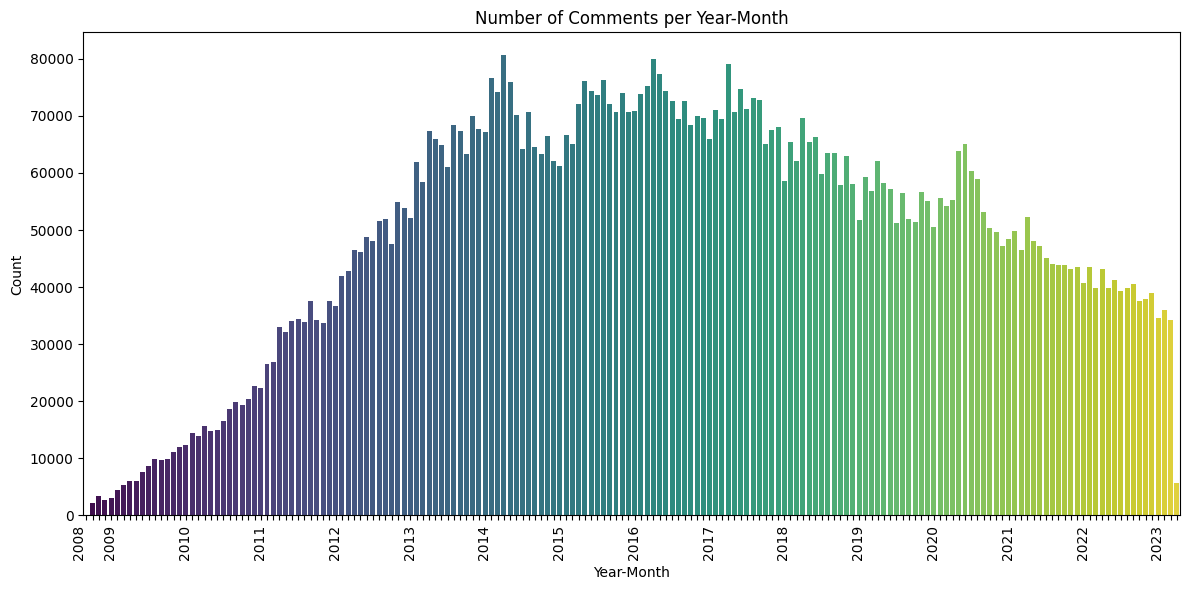

In [33]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="creation_date", y="count", data=comment_counts, palette="viridis")
plt.title("Number of Comments per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability

# Create a list with the desired pattern
year_month_pattern = []

# Get unique years for dropdown options
unique_years = comment_counts['creation_date'].str.split('-').str[0].unique()

for year in unique_years:
    year_month_pattern.append(year)
    year_month_pattern.extend([' '] * (comment_counts['creation_date'].str.startswith(year).sum() - 1))

ax.set_xticklabels(year_month_pattern)

# Show the plot
plt.tight_layout()
plt.show()

This graph is freally helpful and from what I can see here, it most likely indicates the users engagement and happ9iness with the playtform peaked during 2014 and was stayed at it's peak until 2017. By 2018 this started dropping off as we can see a pattern of downards trend with less comments since 2018. Of course, the last bar in 2023 is not necessarily accurate as we probably dont have all the data points for that month. Also, we should keep in mind that we talk a random 10% sample of the dataset.

In terms of next steps, I thought it would be good to visualise the metrics of the comments i.e up_votes and down_votes into a line graph and see that the trend was like over time.

In [45]:
# Get comment count, median of comment score, up_votes and down_votes for each month
comments_stats = sample_users_comments.groupby('creation_date').agg({
    'up_votes': 'median',
    'down_votes': 'median'
}).reset_index()

# Rename the columns so it's easier to understand what they are about
comments_stats = comments_stats.rename(columns={
    'up_votes': 'median_up_votes',
    'down_votes': 'median_down_votes'
})

comments_stats.head()

,creation_date,median_up_votes,median_down_votes
0,2008-08-01,553.00,32.00
1,2008-09-01,713.00,42.00
2,2008-10-01,879.00,50.00
3,2008-11-01,1164.00,52.00
4,2008-12-01,1083.00,61.00


In [48]:
# Changing this to string type again in order to plot it on the graph
comments_stats['creation_date'] = comments_stats['creation_date'].astype(str)


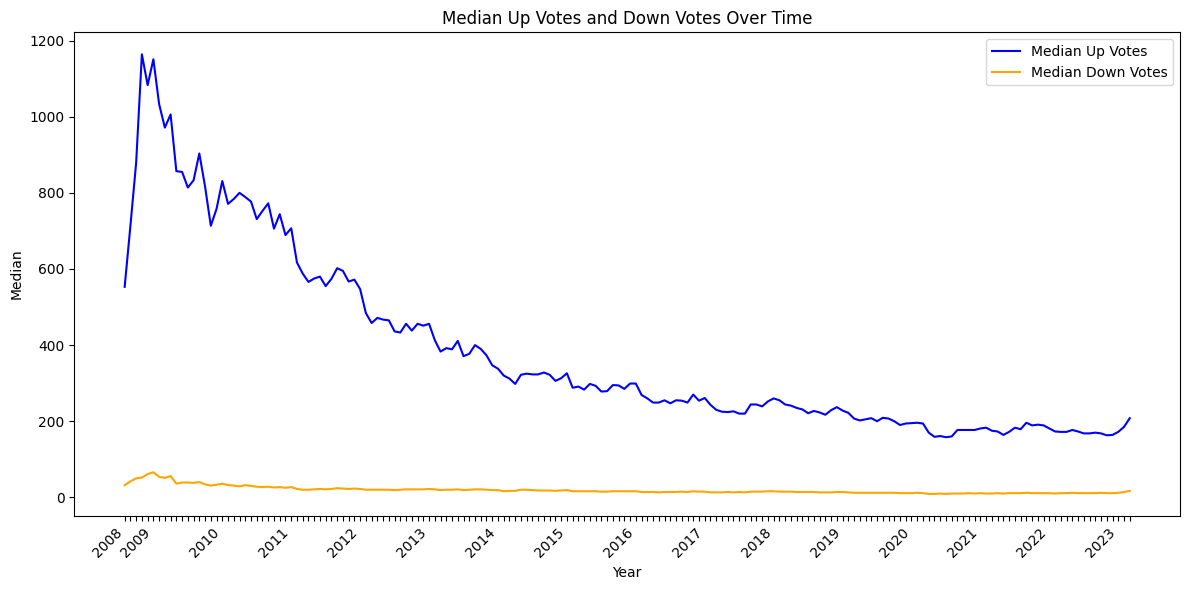

In [53]:
plt.figure(figsize=(12, 6))

# Create line plots for 'median_up_votes' and 'median_down_votes'
plt.plot(comments_stats['creation_date'], comments_stats['median_up_votes'], label='Median Up Votes', color='blue')
plt.plot(comments_stats['creation_date'], comments_stats['median_down_votes'], label='Median Down Votes', color='orange')

plt.title("Median Up Votes and Down Votes Over Time")
plt.xlabel("Year")
plt.ylabel("Median")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Create a list with the desired pattern
year_month_pattern = []

# Get unique years for dropdown options
unique_years = comments_stats['creation_date'].str.split('-').str[0].unique()

for year in unique_years:
    year_month_pattern.append(year)
    year_month_pattern.extend([' '] * (comments_stats['creation_date'].str.startswith(year).sum() - 1))

# Set custom tick labels
plt.xticks(comments_stats['creation_date'], year_month_pattern)

# Show the plot
plt.tight_layout()
plt.show()

This is pretty insightful indicating that when Stackoverflow was first launched more people were more inclined to give upvotes and indicating they found the posts on the platform useful to answer the information they were looking for. We can see a downwards trend starting towards the late 2008/beginning of 2009. This is more useful for measuring the happiness of users on the platform compared to looking at the number of comments over the years. For me, I think less upvotes means people finding the product less useful, likely indicating they became less happy with the product as time went on. I would say that the drop off trend stabilised beginnning 2014 and has stayed around 300 since. Overall I would say the past 8 years, user's happiness with the product did not change.

Overall, when Stackoverflow first took off as a product, it grew in popularity quickly likely why people were more engaged and happy with the platform by giving upvotes. As time went by and the long term users stabilised, the median upvotes stayed around the same.